# Manutenzione preventiva - DoS Attacks

In [176]:
import pandas as pd
import json as json
import ipaddress as ip 
import numpy as np
import warnings
import functions_notebook_new as fn
import functions_notebook_arinew as fan
from datetime import timedelta
from scipy.stats import entropy
import os


warnings.simplefilter(action='ignore', category=FutureWarning)

In [177]:
### Estrazione features, creazione dataframe, scrittura dataframes su disco
levels_of_interest = ['frame', 'eth', 'tcp', 'arp', 'udp', 'modbus', 'icmp', 'ip']
# clean captures
clean_capture = 'captures\\captures1_v2\\captures1_v2\\clean\\eth2dump-clean-0,5_1.json'

# ping flooding captures 
pf_capture_1 = 'captures\\captures1_v2\\captures1_v2\\pingFloodDDoS\\eth2dump-pingFloodDDoS15m-0,5h_1.json'
pf_capture_2 = 'captures\\captures2\\captures2\\pingFloodDDoS\\eth2dump-pingFloodDDoS15m-0,5h_1.json'
pf_capture_3='captures\\captures3\\captures3\\pingFloodDDoS\\eth2dump-pingFloodDDoS15m-0.5h_1.json'

# nome dataframe su disco
dfclean_disk = "compressed_datasets\\captures1_v2\\clean\\df_clean.gzip"
dfpf1_disk = "compressed_datasets\\captures1_v2\\pingFloodDDoS\\dfpf1.gzip"
dfpf2_disk = "compressed_datasets\\captures2\\pingFloodDDoS\\dfpf2.gzipp"
dfpf3_disk = "compressed_datasets\\captures3\\pingFloodDDoS\\dfpf3.gzip"

if not os.path.isfile(dfclean_disk):
	packets_cc = fn.load_packets_from_file(clean_capture)
	features_cc = fn.extract_features_from_packets(packets_cc, levels_of_interest)
	df_cc = pd.DataFrame(features_cc)
	features_cc.clear()
	df_cc.to_pickle(dfclean_disk, compression='gzip')
else:
	df_cc = pd.read_pickle(dfclean_disk, compression='gzip')

if not os.path.isfile(dfpf1_disk):
	pkt_pf_15m_05h = fn.load_packets_from_file(pf_capture_1)
	features_pf_15m_05h = fn.extract_features_from_packets(pkt_pf_15m_05h, levels_of_interest)
	df = pd.DataFrame(features_pf_15m_05h)
	features_pf_15m_05h.clear()
	df.to_pickle(dfpf1_disk, compression='gzip')
else:
	df = pd.read_pickle(dfpf1_disk, compression='gzip')

if not os.path.isfile(dfpf2_disk):
	pkt_pf_15m_05h_2 = fn.load_packets_from_file(pf_capture_2)
	features_pf_15m_05h_2 = fn.extract_features_from_packets(pkt_pf_15m_05h_2, levels_of_interest)
	df1 = pd.DataFrame(features_pf_15m_05h_2)
	features_pf_15m_05h_2.clear()
	df1.to_pickle(dfpf2_disk, compression='gzip')
else:
	df1 = pd.read_pickle(dfpf2_disk, compression='gzip')

if not os.path.isfile(dfpf3_disk):
	pkt_pf_15m_05h_3 = fn.load_packets_from_file(pf_capture_3)
	features_pf_15m_05h_3 = fn.extract_features_from_packets(pkt_pf_15m_05h_3, levels_of_interest)
	df2 = pd.DataFrame(features_pf_15m_05h_3)
	features_pf_15m_05h_3.clear()
	df2.to_pickle(dfpf3_disk, compression='gzip')
else:
	df2 = pd.read_pickle(dfpf3_disk, compression='gzip')

In [178]:
fn.calcolo_features_binarie(df_cc)
fn.calcolo_features_binarie(df)
fn.calcolo_features_binarie(df1)
fn.calcolo_features_binarie(df2)

In [179]:
df_cc['frame.frame.time_utc'] = pd.to_datetime(df_cc['frame.frame.time_utc'])
df['frame.frame.time_utc'] = pd.to_datetime(df['frame.frame.time_utc'])
df1['frame.frame.time_utc'] = pd.to_datetime(df1['frame.frame.time_utc'])
df2['frame.frame.time_utc'] = pd.to_datetime(df2['frame.frame.time_utc'])

In [180]:
df_cc.sort_values(by='frame.frame.time_utc')
df.sort_values(by='frame.frame.time_utc')
df1.sort_values(by='frame.frame.time_utc')
df2.sort_values(by='frame.frame.time_utc')


,frame.frame.encap_type,frame.frame.time,frame.frame.time_utc,frame.frame.time_epoch,frame.frame.offset_shift,frame.frame.time_delta,frame.frame.time_delta_displayed,frame.frame.time_relative,frame.frame.number,frame.frame.len,...,icmp,modbus,icmpv6,dhcp,dhcpv6,browser,llmnr,stp,arp,data
0,1,"Aug 8, 2018 19:37:05.555487000 ora legale Eur...",2018-08-08 17:37:05.555487+00:00,1533749825.555487000,0.000000000,0.000000000,0.000000000,0.000000000,1,66,...,0,1,0,0,0,0,0,0,0,0
1,1,"Aug 8, 2018 19:37:05.562744000 ora legale Eur...",2018-08-08 17:37:05.562744+00:00,1533749825.562744000,0.000000000,0.007257000,0.007257000,0.007257000,2,85,...,0,1,0,0,0,0,0,0,0,0
2,1,"Aug 8, 2018 19:37:05.773296000 ora legale Eur...",2018-08-08 17:37:05.773296+00:00,1533749825.773296000,0.000000000,0.210552000,0.210552000,0.217809000,3,60,...,0,0,0,0,0,0,0,0,0,0
3,1,"Aug 8, 2018 19:37:05.867520000 ora legale Eur...",2018-08-08 17:37:05.867520+00:00,1533749825.867520000,0.000000000,0.094224000,0.094224000,0.312033000,4,66,...,0,1,0,0,0,0,0,0,0,0
4,1,"Aug 8, 2018 19:37:05.872108000 ora legale Eur...",2018-08-08 17:37:05.872108+00:00,1533749825.872108000,0.000000000,0.004588000,0.004588000,0.316621000,5,85,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212236,1,"Aug 8, 2018 20:07:04.798017000 ora legale Eur...",2018-08-08 18:07:04.798017+00:00,1533751624.798017000,0.000000000,0.094252000,0.094252000,1799.242530000,212237,66,...,0,1,0,0,0,0,0,0,0,0
212237,1,"Aug 8, 2018 20:07:04.807663000 ora legale Eur...",2018-08-08 18:07:04.807663+00:00,1533751624.807663000,0.000000000,0.009646000,0.009646000,1799.252176000,212238,85,...,0,1,0,0,0,0,0,0,0,0
212238,1,"Aug 8, 2018 20:07:05.015777000 ora legale Eur...",2018-08-08 18:07:05.015777+00:00,1533751625.015777000,0.000000000,0.208114000,0.208114000,1799.460290000,212239,60,...,0,0,0,0,0,0,0,0,0,0
212239,1,"Aug 8, 2018 20:07:05.110697000 ora legale Eur...",2018-08-08 18:07:05.110697+00:00,1533751625.110697000,0.000000000,0.094920000,0.094920000,1799.555210000,212240,66,...,0,1,0,0,0,0,0,0,0,0


In [181]:
start_time = df['frame.frame.time_utc'].iloc[0]
end_time=start_time+timedelta(seconds=298.8)
end_time2 = end_time + timedelta(seconds=900)

In [182]:
start_time_2 = df1['frame.frame.time_utc'].iloc[0]
end_time_2=start_time_2+timedelta(seconds=299.16)
end_time2_2 = end_time_2 + timedelta(seconds=900)

In [183]:
start_time_3 = df2['frame.frame.time_utc'].iloc[0]
end_time_3=start_time_3+timedelta(seconds=240.59)
end_time2_3 = end_time_3 + timedelta(seconds=959)

In [184]:
df_cc1 = df[(df['frame.frame.time_utc'] >= start_time) & (df['frame.frame.time_utc'] < end_time)].copy()
df_attack = df[(df['frame.frame.time_utc'] >= end_time) & (df['frame.frame.time_utc'] <= end_time2)].copy()
df_cc2 = df[(df['frame.frame.time_utc'] > end_time2)].copy()

In [185]:
df1_cc1_2 = df1[(df1['frame.frame.time_utc'] >= start_time_2) & (df1['frame.frame.time_utc'] < end_time_2)].copy()
df1_attack_2 = df1[(df1['frame.frame.time_utc'] >= end_time_2) & (df1['frame.frame.time_utc'] <= end_time2_2)].copy()
df1_cc2_2 = df1[(df1['frame.frame.time_utc'] > end_time2_2)].copy()

In [186]:
df2_cc1_3 = df2[(df2['frame.frame.time_utc'] >= start_time_3) & (df2['frame.frame.time_utc'] < end_time_3)].copy()
df2_attack_3 = df2[(df2['frame.frame.time_utc'] >= end_time_3) & (df2['frame.frame.time_utc'] <= end_time2_3)].copy()
df2_cc2_3 = df2[(df2['frame.frame.time_utc'] > end_time2_3)].copy()

In [187]:
df_cc_aggregation = fan.calcola_features(df_cc)
df_cc1_aggregation = fan.calcola_features(df_cc1)
df_cc2_aggregation = fan.calcola_features(df_cc2)
df_att_aggregation = fan.calcola_features(df_attack)

In [188]:
df1_cc1_aggregation = fan.calcola_features(df1_cc1_2)
df1_att_aggregation = fan.calcola_features(df1_attack_2)
df1_cc2_aggregation = fan.calcola_features(df1_cc2_2)

In [189]:
df2_cc1_aggregation = fan.calcola_features(df2_cc1_3)
df2_att_aggregation = fan.calcola_features(df2_attack_3)
df2_cc2_aggregation = fan.calcola_features(df2_cc2_3)

In [190]:
df_cc_aggregation['label']=0
df_cc1_aggregation['label']=0
df_cc2_aggregation ['label']=0
df_att_aggregation ['label']=1

df1_cc1_aggregation['label']=0
df1_att_aggregation['label']=1
df1_cc2_aggregation['label']=0

df2_cc1_aggregation['label']=0
df2_att_aggregation['label']=1
df2_cc2_aggregation['label']=0

In [191]:
df_tot = pd.concat([df_cc_aggregation,df_cc1_aggregation,df_cc2_aggregation,df_att_aggregation,df1_cc1_aggregation,df1_att_aggregation,df1_cc2_aggregation,df2_cc1_aggregation, df2_att_aggregation,df2_cc2_aggregation], axis=0)

In [192]:
df_tot['ipat_std'] = df_tot['ipat_std'].dt.total_seconds()
df_tot['ipat_max'] = df_tot['ipat_max'].dt.total_seconds()
df_tot['ipat_min'] = df_tot['ipat_min'].dt.total_seconds()
df_tot['ipat_mode'] = df_tot['ipat_mode'].dt.total_seconds()

In [193]:
df_tot = df_tot.fillna(0)

In [194]:
X = df_tot.drop(columns='label')  
y = df_tot['label'] 

In [195]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'P-value': p_values
})
anova_results_sorted = anova_results.sort_values(by='P-value')


# Aggiungi una colonna per segnalare se la feature può essere scartata (P-value > 0.05)
anova_results_sorted['Discard'] = anova_results_sorted['P-value'] > 0.05



# Mostra le colonne che possono essere scartate
features_to_discard = anova_results_sorted[anova_results_sorted['Discard']]['Feature'].tolist()
print("\nColonne che possono essere scartate:", features_to_discard)


Colonne che possono essere scartate: ['udp_count', 'ipat_min', 'tcp_syn_count', 'ip_dst_mode', 'ip_src_mode']


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 51 52] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [196]:
df_tot=df_tot.drop(columns=['udp_count', 'ipat_min', 'tcp_syn_count', 'ip_dst_mode', 'ip_src_mode'])

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_tot.corr(method='pearson')
correlation_matrix
correlation_matrix1 = correlation_matrix.where(correlation_matrix >0.80)
correlation_matrix1


,eth_count,ip_count,arp_count,tcp_count,mbtcp_count,icmp_count,pkt_count,per_eth_count,per_ip_count,per_icmp_count,...,entropy_iplen,bytes_per_timeunit,pkt_per_timeunit,modbus_response_count,modbus_request_count,modb_req_resp_fraction,icmp_request_count,icmp_response_count,icmp_req_resp_fraction,label
eth_count,1.000000,0.999987,NaN,NaN,NaN,0.998765,1.000000,NaN,0.850273,0.993932,...,NaN,0.998965,1.000000,NaN,NaN,NaN,0.966788,NaN,NaN,0.976738
ip_count,0.999987,1.000000,NaN,NaN,NaN,0.998849,0.999987,NaN,0.851390,0.994051,...,NaN,0.998894,0.999987,NaN,NaN,NaN,0.966855,NaN,NaN,0.976847
arp_count,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tcp_count,NaN,NaN,NaN,1.000000,0.942868,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.931662,0.931988,0.908390,NaN,NaN,NaN,NaN
mbtcp_count,NaN,NaN,NaN,0.942868,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.998833,0.998669,0.987451,NaN,NaN,NaN,NaN
icmp_count,0.998765,0.998849,NaN,NaN,NaN,1.000000,0.998765,NaN,0.840212,0.996294,...,NaN,0.995597,0.998765,NaN,NaN,NaN,0.968180,NaN,NaN,0.977865
pkt_count,1.000000,0.999987,NaN,NaN,NaN,0.998765,1.000000,NaN,0.850273,0.993932,...,NaN,0.998965,1.000000,NaN,NaN,NaN,0.966788,NaN,NaN,0.976738
per_eth_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
per_ip_count,0.850273,0.851390,NaN,NaN,NaN,0.840212,0.850273,NaN,1.000000,0.842065,...,NaN,0.859232,0.850273,NaN,NaN,NaN,0.818003,NaN,NaN,0.832062
per_icmp_count,0.993932,0.994051,NaN,NaN,NaN,0.996294,0.993932,NaN,0.842065,1.000000,...,NaN,0.989824,0.993932,NaN,NaN,NaN,0.965753,NaN,NaN,0.978861


In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

from imblearn.under_sampling import RandomUnderSampler


In [199]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
random_statev = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_statev)
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)
clf1 = DecisionTreeClassifier(
    criterion='gini',          # Criterio di default: indice di Gini per misurare la qualità della suddivisione
    splitter='best',           # Algoritmo di suddivisione: 'best' cerca la migliore suddivisione possibile
    max_depth=None,            # Profondità massima: None (l'albero cresce fino a che tutte le foglie sono pure o contengono meno di min_samples_split campioni)
    min_samples_split=2,       # Numero minimo di campioni per dividere un nodo: 2
    min_samples_leaf=1,        # Numero minimo di campioni necessari in una foglia: 1
    min_weight_fraction_leaf=0.0, # Frazione minima del peso totale che una foglia deve avere: 0.0
    max_features=None,         # Numero di caratteristiche considerate per ogni suddivisione: tutte le caratteristiche
    random_state=None,         # Nessuna impostazione di stato casuale di default (l'albero non è riproducibile senza specificare un valore)
    max_leaf_nodes=None,       # Numero massimo di nodi foglia: None (nessun limite)
    min_impurity_decrease=0.0, # Nessun decremento minimo di impurezza richiesto per la divisione
    class_weight=None,         # Nessun bilanciamento dei pesi tra le classi (None)
    ccp_alpha=0.0              # Nessuna potatura predefinita tramite complessità dei costi (alpha = 0)
)
clf1.fit(X_train_balanced, y_train_balanced)
y_pred = clf1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuratezza sul test set: {accuracy_1 * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_1:.5f}")




Accuratezza sul test set: 99.31%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       269
           1       0.98      1.00      0.99       166

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

F1 Score: 0.99311


In [200]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random_statev)
X_train_balanced1, y_train_balanced1 = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_balanced_t1 = scaler.fit_transform(X_train_balanced1)  
X_test_t = scaler.transform(X_test)                         
rf = RandomForestClassifier(
    n_estimators=100,          # Numero di alberi nella foresta
    max_depth=None,            # Profondità massima degli alberi
    min_samples_split=2,       # Numero minimo di campioni richiesti per dividere un nodo
    min_samples_leaf=1,        # Numero minimo di campioni in un nodo foglia
    max_features='sqrt',       # Numero di caratteristiche da considerare alla ricerca della migliore divisione
    bootstrap=True,            # Utilizza il campionamento bootstrap
    random_state=random_statev
)

rf.fit(X_train_balanced_t1, y_train_balanced1)
y_pred = rf.predict(X_test_t)
accuracy_2 = accuracy_score(y_test, y_pred)  
f1_2 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy_2 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f1_2:.5f}")  

Accuratezza: 98.85%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       0.99      0.98      0.98       166

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

Punteggio F1: 0.98850


In [201]:
knn = KNeighborsClassifier()  
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred) 
f1_3 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuracy: {accuracy_3 * 100:.2f}%") 
print("Classification Report:")
print(classification_report(y_test, y_pred))  
print(f"F1 Score: {f1_3:.5f}")

Accuracy: 98.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       0.99      0.98      0.98       166

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

F1 Score: 0.98850


In [202]:

scaler = StandardScaler()
X_train_balanced_t = scaler.fit_transform(X_train_balanced)  
X_test_t = scaler.transform(X_test)                        
svm = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=random_statev)
svm.fit(X_train_balanced_t, y_train_balanced)
y_pred = svm.predict(X_test_t)
accuracy_4 = accuracy_score(y_test, y_pred)  
f1_4 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy_4 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f1_4:.5f}")  

Accuratezza: 98.85%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       0.99      0.98      0.98       166

    accuracy                           0.99       435
   macro avg       0.99      0.99      0.99       435
weighted avg       0.99      0.99      0.99       435

Punteggio F1: 0.98850


In [203]:
# ping flooding captures 1 min
pf_capture_1 = 'captures\\captures1_v2\\captures1_v2\\pingFloodDDoS\\eth2dump-pingFloodDDoS5m-0,5h_1.json'
pf_capture_2 = 'captures\\captures2\\captures2\\pingFloodDDoS\\eth2dump-pingFloodDDoS5m-0,5h_1.json'
pf_capture_3='captures\\captures3\\captures3\\pingFloodDDoS\\eth2dump-pingFloodDDoS5m-0,5h_1.json'

# nome dataframe su disco
dfclean_disk = "compressed_datasets\\captures1_v2\\clean\\df_clean.gzip"
dfpf1_disk_05_5 = "compressed_datasets\\captures1_v2\\pingFloodDDoS\\dfpf1_05_5.gzip"
dfpf2_disk_05_5= "compressed_datasets\\captures2\\pingFloodDDoS\\dfpf2_05_5.gzip"
dfpf3_disk_05_5 = "compressed_datasets\\captures3\\pingFloodDDoS\\dfpf3_05_5.gzip"

if not os.path.isfile(dfclean_disk):
	packets_cc = fn.load_packets_from_file(clean_capture)
	features_cc = fn.extract_features_from_packets(packets_cc, levels_of_interest)
	df_cc = pd.DataFrame(features_cc)
	features_cc.clear()
	df_cc.to_pickle(dfclean_disk, compression='gzip')
else:
	df_cc = pd.read_pickle(dfclean_disk, compression='gzip')

if not os.path.isfile(dfpf1_disk_05_5):
	pkt_pf_15m_05h = fn.load_packets_from_file(pf_capture_1)
	features_pf_15m_05h = fn.extract_features_from_packets(pkt_pf_15m_05h, levels_of_interest)
	df = pd.DataFrame(features_pf_15m_05h)
	features_pf_15m_05h.clear()
	df.to_pickle(dfpf1_disk_05_5, compression='gzip')
else:
	df = pd.read_pickle(dfpf1_disk_05_5, compression='gzip')

if not os.path.isfile(dfpf2_disk_05_5):
	pkt_pf_15m_05h_2 = fn.load_packets_from_file(pf_capture_2)
	features_pf_15m_05h_2 = fn.extract_features_from_packets(pkt_pf_15m_05h_2, levels_of_interest)
	df1 = pd.DataFrame(features_pf_15m_05h_2)
	features_pf_15m_05h_2.clear()
	df1.to_pickle(dfpf2_disk_05_5, compression='gzip')
else:
	df1 = pd.read_pickle(dfpf2_disk_05_5, compression='gzip')

if not os.path.isfile(dfpf3_disk_05_5):
	pkt_pf_15m_05h_3 = fn.load_packets_from_file(pf_capture_3)
	features_pf_15m_05h_3 = fn.extract_features_from_packets(pkt_pf_15m_05h_3, levels_of_interest)
	df2 = pd.DataFrame(features_pf_15m_05h_3)
	features_pf_15m_05h_3.clear()
	df2.to_pickle(dfpf3_disk_05_5, compression='gzip')
else:
	df2 = pd.read_pickle(dfpf3_disk_05_5, compression='gzip')

In [204]:
fn.calcolo_features_binarie(df_cc)
fn.calcolo_features_binarie(df)
fn.calcolo_features_binarie(df1)
fn.calcolo_features_binarie(df2)

In [205]:
df_cc['frame.frame.time_utc'] = pd.to_datetime(df_cc['frame.frame.time_utc'])
df['frame.frame.time_utc'] = pd.to_datetime(df['frame.frame.time_utc'])
df1['frame.frame.time_utc'] = pd.to_datetime(df1['frame.frame.time_utc'])
df2['frame.frame.time_utc'] = pd.to_datetime(df2['frame.frame.time_utc'])

In [206]:
df_cc.sort_values(by='frame.frame.time_utc')
df.sort_values(by='frame.frame.time_utc')
df1.sort_values(by='frame.frame.time_utc')
df2.sort_values(by='frame.frame.time_utc')
df2

,frame.frame.encap_type,frame.frame.time,frame.frame.time_utc,frame.frame.time_epoch,frame.frame.offset_shift,frame.frame.time_delta,frame.frame.time_delta_displayed,frame.frame.time_relative,frame.frame.number,frame.frame.len,...,icmp,modbus,icmpv6,dhcp,dhcpv6,browser,llmnr,stp,ipv6.hopopts,data
0,1,"Aug 8, 2018 19:06:45.892610000 ora legale Eur...",2018-08-08 17:06:45.892610+00:00,1533748005.892610000,0.000000000,0.000000000,0.000000000,0.000000000,1,66,...,0,1,0,0,0,0,0,0,0,0
1,1,"Aug 8, 2018 19:06:45.896992000 ora legale Eur...",2018-08-08 17:06:45.896992+00:00,1533748005.896992000,0.000000000,0.004382000,0.004382000,0.004382000,2,85,...,0,1,0,0,0,0,0,0,0,0
2,1,"Aug 8, 2018 19:06:45.954339000 ora legale Eur...",2018-08-08 17:06:45.954339+00:00,1533748005.954339000,0.000000000,0.057347000,0.057347000,0.061729000,3,64,...,0,0,0,0,0,0,0,1,0,0
3,1,"Aug 8, 2018 19:06:46.110235000 ora legale Eur...",2018-08-08 17:06:46.110235+00:00,1533748006.110235000,0.000000000,0.155896000,0.155896000,0.217625000,4,60,...,0,0,0,0,0,0,0,0,0,0
4,1,"Aug 8, 2018 19:06:46.204464000 ora legale Eur...",2018-08-08 17:06:46.204464+00:00,1533748006.204464000,0.000000000,0.094229000,0.094229000,0.311854000,5,66,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94295,1,"Aug 8, 2018 19:36:44.662447000 ora legale Eur...",2018-08-08 17:36:44.662447+00:00,1533749804.662447000,0.000000000,0.010439000,0.010439000,1798.769837000,94296,85,...,0,1,0,0,0,0,0,0,0,0
94296,1,"Aug 8, 2018 19:36:44.869635000 ora legale Eur...",2018-08-08 17:36:44.869635+00:00,1533749804.869635000,0.000000000,0.207188000,0.207188000,1798.977025000,94297,60,...,0,0,0,0,0,0,0,0,0,0
94297,1,"Aug 8, 2018 19:36:44.963849000 ora legale Eur...",2018-08-08 17:36:44.963849+00:00,1533749804.963849000,0.000000000,0.094214000,0.094214000,1799.071239000,94298,66,...,0,1,0,0,0,0,0,0,0,0
94298,1,"Aug 8, 2018 19:36:44.971791000 ora legale Eur...",2018-08-08 17:36:44.971791+00:00,1533749804.971791000,0.000000000,0.007942000,0.007942000,1799.079181000,94299,85,...,0,1,0,0,0,0,0,0,0,0


In [207]:
start_time = df['frame.frame.time_utc'].iloc[0]
end_time=start_time+timedelta(seconds=303)
end_time2 = end_time + timedelta(seconds=300)

In [208]:
start_time_2 = df1['frame.frame.time_utc'].iloc[0]
end_time_2=start_time_2+timedelta(seconds=299)
end_time2_2 = end_time_2 + timedelta(seconds=300)

In [209]:
start_time_3 = df2['frame.frame.time_utc'].iloc[0]
end_time_3=start_time_3+timedelta(seconds=299)
end_time2_3 = end_time_3 + timedelta(seconds=310)

In [210]:
df_cc1 = df[(df['frame.frame.time_utc'] >= start_time) & (df['frame.frame.time_utc'] < end_time)].copy()
df_attack = df[(df['frame.frame.time_utc'] >= end_time) & (df['frame.frame.time_utc'] <= end_time2)].copy()
df_cc2 = df[(df['frame.frame.time_utc'] > end_time2)].copy()

In [211]:
df1_cc1_2 = df1[(df1['frame.frame.time_utc'] >= start_time_2) & (df1['frame.frame.time_utc'] < end_time_2)].copy()
df1_attack_2 = df1[(df1['frame.frame.time_utc'] >= end_time_2) & (df1['frame.frame.time_utc'] <= end_time2_2)].copy()
df1_cc2_2 = df1[(df1['frame.frame.time_utc'] > end_time2_2)].copy()

In [212]:
df2_cc1_3 = df2[(df2['frame.frame.time_utc'] >= start_time_3) & (df2['frame.frame.time_utc'] < end_time_3)].copy()
df2_attack_3 = df2[(df2['frame.frame.time_utc'] >= end_time_3) & (df2['frame.frame.time_utc'] <= end_time2_3)].copy()
df2_cc2_3 = df2[(df2['frame.frame.time_utc'] > end_time2_3)].copy()

In [213]:
df_cc_aggregation = fan.calcola_features(df_cc)
df_cc1_aggregation = fan.calcola_features(df_cc1)
df_cc2_aggregation = fan.calcola_features(df_cc2)
df_att_aggregation = fan.calcola_features(df_attack)

In [214]:
df1_cc1_aggregation = fan.calcola_features(df1_cc1_2)
df1_att_aggregation = fan.calcola_features(df1_attack_2)
df1_cc2_aggregation = fan.calcola_features(df1_cc2_2)

In [215]:
df2_cc1_aggregation = fan.calcola_features(df2_cc1_3)
df2_att_aggregation = fan.calcola_features(df2_attack_3)
df2_cc2_aggregation = fan.calcola_features(df2_cc2_3)

In [216]:
df_cc_aggregation['label']=0
df_cc1_aggregation['label']=0
df_cc2_aggregation ['label']=0
df_att_aggregation ['label']=1

df1_cc1_aggregation['label']=0
df1_att_aggregation['label']=1
df1_cc2_aggregation['label']=0

df2_cc1_aggregation['label']=0
df2_att_aggregation['label']=1
df2_cc2_aggregation['label']=0

In [217]:
df_tot = pd.concat([df_cc_aggregation,df_cc1_aggregation,df_cc2_aggregation,df_att_aggregation,df1_cc1_aggregation,df1_att_aggregation,df1_cc2_aggregation,df2_cc1_aggregation, df2_att_aggregation,df2_cc2_aggregation], axis=0)

In [218]:
df_tot['ipat_std'] = df_tot['ipat_std'].dt.total_seconds()
df_tot['ipat_max'] = df_tot['ipat_max'].dt.total_seconds()
df_tot['ipat_min'] = df_tot['ipat_min'].dt.total_seconds()
df_tot['ipat_mode'] = df_tot['ipat_mode'].dt.total_seconds()

In [219]:
df_tot = df_tot.fillna(0)

In [220]:
X = df_tot.drop(columns='label')  
y = df_tot['label'] 

In [221]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'P-value': p_values
})
anova_results_sorted = anova_results.sort_values(by='P-value')
print(anova_results_sorted)

                    Feature       F-value        P-value
0                 eth_count  35073.519778   0.000000e+00
1                  ip_count  35609.311178   0.000000e+00
6                icmp_count  44022.925992   0.000000e+00
7                 pkt_count  35073.519778   0.000000e+00
13            per_tcp_count  34295.423941   0.000000e+00
10           per_icmp_count  46663.885219   0.000000e+00
31      tcp_dstport_entropy  15435.723365   0.000000e+00
23               ip_src_std  14427.032563   0.000000e+00
25           ip_src_entropy  40560.795005   0.000000e+00
28           ip_dst_entropy  12464.533055   0.000000e+00
29          tcp_dstport_std  18052.081457   0.000000e+00
45       bytes_per_timeunit  25267.046380   0.000000e+00
39      stdnum_unique_ipdst  30586.823514   0.000000e+00
36      maxnum_unique_ipdst  39156.540274   0.000000e+00
35      tcp_srcport_entropy   9511.753942   0.000000e+00
33          tcp_srcport_std  16451.490924   0.000000e+00
41         num_unique_ipsrc  43

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 51 52] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_tot.corr(method='pearson')
correlation_matrix
correlation_matrix1 = correlation_matrix.where(correlation_matrix >0.80)
correlation_matrix1


,eth_count,ip_count,arp_count,udp_count,tcp_count,mbtcp_count,icmp_count,pkt_count,per_eth_count,per_ip_count,...,entropy_iplen,bytes_per_timeunit,pkt_per_timeunit,modbus_response_count,modbus_request_count,modb_req_resp_fraction,icmp_request_count,icmp_response_count,icmp_req_resp_fraction,label
eth_count,1.000000,0.999975,NaN,NaN,NaN,NaN,0.997256,1.000000,NaN,NaN,...,NaN,0.997748,1.000000,NaN,NaN,NaN,0.996853,NaN,NaN,0.979976
ip_count,0.999975,1.000000,NaN,NaN,NaN,NaN,0.997439,0.999975,NaN,NaN,...,NaN,0.997588,0.999975,NaN,NaN,NaN,0.997046,NaN,NaN,0.980268
arp_count,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udp_count,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tcp_count,NaN,NaN,NaN,NaN,1.000000,0.941530,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.930076,0.930409,0.909765,NaN,NaN,NaN,NaN
mbtcp_count,NaN,NaN,NaN,NaN,0.941530,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.998916,0.998758,0.988615,NaN,NaN,NaN,NaN
icmp_count,0.997256,0.997439,NaN,NaN,NaN,NaN,1.000000,0.997256,NaN,NaN,...,NaN,0.990303,0.997256,NaN,NaN,NaN,0.999637,NaN,NaN,0.983949
pkt_count,1.000000,0.999975,NaN,NaN,NaN,NaN,0.997256,1.000000,NaN,NaN,...,NaN,0.997748,1.000000,NaN,NaN,NaN,0.996853,NaN,NaN,0.979976
per_eth_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
per_ip_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
random_statev = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_statev)
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)
clf1 = DecisionTreeClassifier(
    criterion='gini',          # Criterio di default: indice di Gini per misurare la qualità della suddivisione
    splitter='best',           # Algoritmo di suddivisione: 'best' cerca la migliore suddivisione possibile
    max_depth=None,            # Profondità massima: None (l'albero cresce fino a che tutte le foglie sono pure o contengono meno di min_samples_split campioni)
    min_samples_split=2,       # Numero minimo di campioni per dividere un nodo: 2
    min_samples_leaf=1,        # Numero minimo di campioni necessari in una foglia: 1
    min_weight_fraction_leaf=0.0, # Frazione minima del peso totale che una foglia deve avere: 0.0
    max_features=None,         # Numero di caratteristiche considerate per ogni suddivisione: tutte le caratteristiche
    random_state=None,         # Nessuna impostazione di stato casuale di default (l'albero non è riproducibile senza specificare un valore)
    max_leaf_nodes=None,       # Numero massimo di nodi foglia: None (nessun limite)
    min_impurity_decrease=0.0, # Nessun decremento minimo di impurezza richiesto per la divisione
    class_weight=None,         # Nessun bilanciamento dei pesi tra le classi (None)
    ccp_alpha=0.0              # Nessuna potatura predefinita tramite complessità dei costi (alpha = 0)
)
clf1.fit(X_train_balanced, y_train_balanced)
y_pred = clf1.predict(X_test)
accuracy1_1 = accuracy_score(y_test, y_pred)
f11_1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuratezza sul test set: {accuracy1_1 * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f11_1:.5f}")



Accuratezza sul test set: 99.08%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       382
           1       0.93      1.00      0.96        53

    accuracy                           0.99       435
   macro avg       0.96      0.99      0.98       435
weighted avg       0.99      0.99      0.99       435

F1 Score: 0.99095


In [224]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random_statev)
X_train_balanced1, y_train_balanced1 = smote.fit_resample(X_train, y_train)

# Normalizzazione dei dati
scaler = StandardScaler()
X_train_balanced_t1 = scaler.fit_transform(X_train_balanced1) 
X_test_t = scaler.transform(X_test)                      
rf = RandomForestClassifier(
    n_estimators=100,          # Numero di alberi nella foresta
    max_depth=None,            # Profondità massima degli alberi
    min_samples_split=2,       # Numero minimo di campioni richiesti per dividere un nodo
    min_samples_leaf=1,        # Numero minimo di campioni in un nodo foglia
    max_features='sqrt',       # Numero di caratteristiche da considerare alla ricerca della migliore divisione
    bootstrap=True,            # Utilizza il campionamento bootstrap
    random_state=random_statev
)
rf.fit(X_train_balanced_t1, y_train_balanced1)
y_pred = rf.predict(X_test_t)
accuracy1_2 = accuracy_score(y_test, y_pred)  
f11_2 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy1_2 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f11_2:.5f}")  

Accuratezza: 99.54%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       382
           1       0.96      1.00      0.98        53

    accuracy                           1.00       435
   macro avg       0.98      1.00      0.99       435
weighted avg       1.00      1.00      1.00       435

Punteggio F1: 0.99544


In [225]:
knn = KNeighborsClassifier() 
knn.fit(X_train_balanced , y_train_balanced)
y_pred = knn.predict(X_test)
accuracy1_3 = accuracy_score(y_test, y_pred) 
f11_3 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuracy: {accuracy1_3 * 100:.2f}%") 
print("Classification Report:")
print(classification_report(y_test, y_pred))  
print(f"F1 Score: {f11_3:.5f}")


Accuracy: 98.39%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       382
           1       0.88      1.00      0.94        53

    accuracy                           0.98       435
   macro avg       0.94      0.99      0.96       435
weighted avg       0.99      0.98      0.98       435

F1 Score: 0.98433


In [226]:
scaler = StandardScaler()
X_train_balanced_t = scaler.fit_transform(X_train_balanced)  
X_test_t = scaler.transform(X_test)                        
svm = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=random_statev)
svm.fit(X_train_balanced_t, y_train_balanced)
y_pred = svm.predict(X_test_t)
accuracy1_4 = accuracy_score(y_test, y_pred)  
f11_4 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy1_4 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f11_4:.5f}")  


Accuratezza: 99.08%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       382
           1       0.93      1.00      0.96        53

    accuracy                           0.99       435
   macro avg       0.96      0.99      0.98       435
weighted avg       0.99      0.99      0.99       435

Punteggio F1: 0.99095


In [227]:
pf_capture_1 = 'captures\\captures1_v2\\captures1_v2\\pingFloodDDoS\\eth2dump-pingFloodDDoS1m-0,5h_1.json'
pf_capture_2 = 'captures\\captures2\\captures2\\pingFloodDDoS\\eth2dump-pingFloodDDoS1m-0,5h_1.json'
pf_capture_3='captures\\captures3\\captures3\\pingFloodDDoS\\eth2dump-pingFloodDDoS1m-0,5h_1.json'

dfpf1_disk_05_1 = "compressed_datasets\\captures1_v2\\pingFloodDDoS\\dfpf1_05_1.gzip"
dfpf2_disk_05_1= "compressed_datasets\\captures2\\pingFloodDDoS\\dfpf2_05_1.gzip"
dfpf3_disk_05_1= "compressed_datasets\\captures3\\pingFloodDDoS\\dfpf3_05_1.gzip"

if not os.path.isfile(dfclean_disk):
	packets_cc = fn.load_packets_from_file(clean_capture)
	features_cc = fn.extract_features_from_packets(packets_cc, levels_of_interest)
	df_cc = pd.DataFrame(features_cc)
	features_cc.clear()
	df_cc.to_pickle(dfclean_disk, compression='gzip')
else:
	df_cc = pd.read_pickle(dfclean_disk, compression='gzip')

if not os.path.isfile(dfpf1_disk_05_1):
	pkt_pf_15m_05h = fn.load_packets_from_file(pf_capture_1)
	features_pf_15m_05h = fn.extract_features_from_packets(pkt_pf_15m_05h, levels_of_interest)
	df = pd.DataFrame(features_pf_15m_05h)
	features_pf_15m_05h.clear()
	df.to_pickle(dfpf1_disk_05_1, compression='gzip')
else:
	df = pd.read_pickle(dfpf1_disk_05_1, compression='gzip')

if not os.path.isfile(dfpf2_disk_05_1):
	pkt_pf_15m_05h_2 = fn.load_packets_from_file(pf_capture_2)
	features_pf_15m_05h_2 = fn.extract_features_from_packets(pkt_pf_15m_05h_2, levels_of_interest)
	df1 = pd.DataFrame(features_pf_15m_05h_2)
	features_pf_15m_05h_2.clear()
	df1.to_pickle(dfpf2_disk_05_1, compression='gzip')
else:
	df1 = pd.read_pickle(dfpf2_disk_05_1, compression='gzip')

if not os.path.isfile(dfpf3_disk_05_1):
	pkt_pf_15m_05h_3 = fn.load_packets_from_file(pf_capture_3)
	features_pf_15m_05h_3 = fn.extract_features_from_packets(pkt_pf_15m_05h_3, levels_of_interest)
	df2 = pd.DataFrame(features_pf_15m_05h_3)
	features_pf_15m_05h_3.clear()
	df2.to_pickle(dfpf3_disk_05_1, compression='gzip')
else:
	df2 = pd.read_pickle(dfpf3_disk_05_1, compression='gzip')

In [228]:
fn.calcolo_features_binarie(df_cc)
fn.calcolo_features_binarie(df)
fn.calcolo_features_binarie(df1)
fn.calcolo_features_binarie(df2)

In [229]:
df_cc['frame.frame.time_utc'] = pd.to_datetime(df_cc['frame.frame.time_utc'])
df['frame.frame.time_utc'] = pd.to_datetime(df['frame.frame.time_utc'])
df1['frame.frame.time_utc'] = pd.to_datetime(df1['frame.frame.time_utc'])
df2['frame.frame.time_utc'] = pd.to_datetime(df2['frame.frame.time_utc'])

In [230]:
df_cc.sort_values(by='frame.frame.time_utc')
df.sort_values(by='frame.frame.time_utc')
df1.sort_values(by='frame.frame.time_utc')
df2.sort_values(by='frame.frame.time_utc')
df1

,frame.frame.encap_type,frame.frame.time,frame.frame.time_utc,frame.frame.time_epoch,frame.frame.offset_shift,frame.frame.time_delta,frame.frame.time_delta_displayed,frame.frame.time_relative,frame.frame.number,frame.frame.len,...,icmp,modbus,dhcp,icmpv6,dhcpv6,browser,llmnr,stp,ipv6.hopopts,data
0,1,"Aug 9, 2018 01:26:58.620063000 ora legale Eur...",2018-08-08 23:26:58.620063+00:00,1533770818.620063000,0.000000000,0.000000000,0.000000000,0.000000000,1,60,...,0,0,0,0,0,0,0,0,0,0
1,1,"Aug 9, 2018 01:26:58.684916000 ora legale Eur...",2018-08-08 23:26:58.684916+00:00,1533770818.684916000,0.000000000,0.064853000,0.064853000,0.064853000,2,60,...,0,0,0,0,0,0,0,0,0,0
2,1,"Aug 9, 2018 01:26:58.714934000 ora legale Eur...",2018-08-08 23:26:58.714934+00:00,1533770818.714934000,0.000000000,0.030018000,0.030018000,0.094871000,3,66,...,0,1,0,0,0,0,0,0,0,0
3,1,"Aug 9, 2018 01:26:58.721864000 ora legale Eur...",2018-08-08 23:26:58.721864+00:00,1533770818.721864000,0.000000000,0.006930000,0.006930000,0.101801000,4,85,...,0,1,0,0,0,0,0,0,0,0
4,1,"Aug 9, 2018 01:26:58.932079000 ora legale Eur...",2018-08-08 23:26:58.932079+00:00,1533770818.932079000,0.000000000,0.210215000,0.210215000,0.312016000,5,60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47167,1,"Aug 9, 2018 01:56:58.038543000 ora legale Eur...",2018-08-08 23:56:58.038543+00:00,1533772618.038543000,0.000000000,0.000853000,0.000853000,1799.418480000,47168,66,...,0,1,0,0,0,0,0,0,0,0
47168,1,"Aug 9, 2018 01:56:58.117276000 ora legale Eur...",2018-08-08 23:56:58.117276+00:00,1533772618.117276000,0.000000000,0.078733000,0.078733000,1799.497213000,47169,60,...,0,0,0,0,0,0,0,0,0,0
47169,1,"Aug 9, 2018 01:56:58.227295000 ora legale Eur...",2018-08-08 23:56:58.227295+00:00,1533772618.227295000,0.000000000,0.110019000,0.110019000,1799.607232000,47170,66,...,0,1,0,0,0,0,0,0,0,0
47170,1,"Aug 9, 2018 01:56:58.237737000 ora legale Eur...",2018-08-08 23:56:58.237737+00:00,1533772618.237737000,0.000000000,0.010442000,0.010442000,1799.617674000,47171,85,...,0,1,0,0,0,0,0,0,0,0


In [231]:
start_time = df['frame.frame.time_utc'].iloc[0]
end_time=start_time+timedelta(seconds=298)
end_time2 = end_time + timedelta(seconds=60)

In [232]:
start_time_2 = df1['frame.frame.time_utc'].iloc[0]
end_time_2=start_time_2+timedelta(seconds=299)
end_time2_2 = end_time_2 + timedelta(seconds=60)

In [233]:
start_time_3 = df2['frame.frame.time_utc'].iloc[0]
end_time_3=start_time_3+timedelta(seconds=299)
end_time2_3 = end_time_3 + timedelta(seconds=60)

In [234]:
df_cc1 = df[(df['frame.frame.time_utc'] >= start_time) & (df['frame.frame.time_utc'] < end_time)].copy()
df_attack = df[(df['frame.frame.time_utc'] >= end_time) & (df['frame.frame.time_utc'] <= end_time2)].copy()
df_cc2 = df[(df['frame.frame.time_utc'] > end_time2)].copy()

In [235]:
df1_cc1_2 = df1[(df1['frame.frame.time_utc'] >= start_time_2) & (df1['frame.frame.time_utc'] < end_time_2)].copy()
df1_attack_2 = df1[(df1['frame.frame.time_utc'] >= end_time_2) & (df1['frame.frame.time_utc'] <= end_time2_2)].copy()
df1_cc2_2 = df1[(df1['frame.frame.time_utc'] > end_time2_2)].copy()

In [236]:
df2_cc1_3 = df2[(df2['frame.frame.time_utc'] >= start_time_3) & (df2['frame.frame.time_utc'] < end_time_3)].copy()
df2_attack_3 = df2[(df2['frame.frame.time_utc'] >= end_time_3) & (df2['frame.frame.time_utc'] <= end_time2_3)].copy()
df2_cc2_3 = df2[(df2['frame.frame.time_utc'] > end_time2_3)].copy()



In [237]:
df_cc_aggregation = fan.calcola_features(df_cc)
df_cc1_aggregation = fan.calcola_features(df_cc1)
df_cc2_aggregation = fan.calcola_features(df_cc2)
df_att_aggregation = fan.calcola_features(df_attack)

In [238]:
df1_cc1_aggregation = fan.calcola_features(df1_cc1_2)
df1_att_aggregation = fan.calcola_features(df1_attack_2)
df1_cc2_aggregation = fan.calcola_features(df1_cc2_2)

In [239]:
df2_cc1_aggregation = fan.calcola_features(df2_cc1_3)
df2_att_aggregation = fan.calcola_features(df2_attack_3)
df2_cc2_aggregation = fan.calcola_features(df2_cc2_3)

In [240]:
df_cc_aggregation['label']=0
df_cc1_aggregation['label']=0
df_cc2_aggregation ['label']=0
df_att_aggregation ['label']=1

df1_cc1_aggregation['label']=0
df1_att_aggregation['label']=1
df1_cc2_aggregation['label']=0

df2_cc1_aggregation['label']=0
df2_att_aggregation['label']=1
df2_cc2_aggregation['label']=0

In [241]:
df_tot = pd.concat([df_cc_aggregation,df_cc1_aggregation,df_cc2_aggregation,df_att_aggregation,df1_cc1_aggregation,df1_att_aggregation,df1_cc2_aggregation,df2_cc1_aggregation, df2_att_aggregation,df2_cc2_aggregation], axis=0)

In [242]:
df_tot['ipat_std'] = df_tot['ipat_std'].dt.total_seconds()
df_tot['ipat_max'] = df_tot['ipat_max'].dt.total_seconds()
df_tot['ipat_min'] = df_tot['ipat_min'].dt.total_seconds()
df_tot['ipat_mode'] = df_tot['ipat_mode'].dt.total_seconds()

In [243]:
df_tot = df_tot.fillna(0)

In [244]:
X = df_tot.drop(columns='label')  
y = df_tot['label'] 

In [245]:
X.replace([float('inf'), float('-inf')], 0, inplace=True) 

In [246]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
random_statev = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_statev)
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)
clf1 = DecisionTreeClassifier(
    criterion='gini',          # Criterio di default: indice di Gini per misurare la qualità della suddivisione
    splitter='best',           # Algoritmo di suddivisione: 'best' cerca la migliore suddivisione possibile
    max_depth=None,            # Profondità massima: None (l'albero cresce fino a che tutte le foglie sono pure o contengono meno di min_samples_split campioni)
    min_samples_split=2,       # Numero minimo di campioni per dividere un nodo: 2
    min_samples_leaf=1,        # Numero minimo di campioni necessari in una foglia: 1
    min_weight_fraction_leaf=0.0, # Frazione minima del peso totale che una foglia deve avere: 0.0
    max_features=None,         # Numero di caratteristiche considerate per ogni suddivisione: tutte le caratteristiche
    random_state=None,         # Nessuna impostazione di stato casuale di default (l'albero non è riproducibile senza specificare un valore)
    max_leaf_nodes=None,       # Numero massimo di nodi foglia: None (nessun limite)
    min_impurity_decrease=0.0, # Nessun decremento minimo di impurezza richiesto per la divisione
    class_weight=None,         # Nessun bilanciamento dei pesi tra le classi (None)
    ccp_alpha=0.0              # Nessuna potatura predefinita tramite complessità dei costi (alpha = 0)
)
clf1.fit(X_train_balanced, y_train_balanced)
y_pred = clf1.predict(X_test)
accuracy2_1 = accuracy_score(y_test, y_pred)
f12_1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuratezza sul test set: {accuracy2_1 * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f12_1:.5f}")


Accuratezza sul test set: 99.77%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.94      1.00      0.97        17

    accuracy                           1.00       435
   macro avg       0.97      1.00      0.99       435
weighted avg       1.00      1.00      1.00       435

F1 Score: 0.99773


In [247]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random_statev)
X_train_balanced1, y_train_balanced1 = smote.fit_resample(X_train, y_train)

# Normalizzazione dei dati
scaler = StandardScaler()
X_train_balanced_t1 = scaler.fit_transform(X_train_balanced1) 
X_test_t = scaler.transform(X_test)                         

rf = RandomForestClassifier(
    n_estimators=100,          # Numero di alberi nella foresta
    max_depth=None,            # Profondità massima degli alberi
    min_samples_split=2,       # Numero minimo di campioni richiesti per dividere un nodo
    min_samples_leaf=1,        # Numero minimo di campioni in un nodo foglia
    max_features='sqrt',       # Numero di caratteristiche da considerare alla ricerca della migliore divisione
    bootstrap=True,            # Utilizza il campionamento bootstrap
    random_state=random_statev
)
rf.fit(X_train_balanced_t1, y_train_balanced1)
y_pred = rf.predict(X_test_t)
accuracy2_2 = accuracy_score(y_test, y_pred)  
f12_2 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy2_2 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f12_2:.5f}")  

Accuratezza: 99.77%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.94      1.00      0.97        17

    accuracy                           1.00       435
   macro avg       0.97      1.00      0.99       435
weighted avg       1.00      1.00      1.00       435

Punteggio F1: 0.99773


In [248]:
knn = KNeighborsClassifier() 
knn.fit(X_train_balanced , y_train_balanced)
y_pred = knn.predict(X_test)
accuracy2_3 = accuracy_score(y_test, y_pred) 
f12_3 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuracy: {accuracy2_3 * 100:.2f}%") 
print("Classification Report:")
print(classification_report(y_test, y_pred))  
print(f"F1 Score: {f12_3:.5f}")

Accuracy: 99.77%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.94      1.00      0.97        17

    accuracy                           1.00       435
   macro avg       0.97      1.00      0.99       435
weighted avg       1.00      1.00      1.00       435

F1 Score: 0.99773


In [249]:
scaler = StandardScaler()
X_train_balanced_t = scaler.fit_transform(X_train_balanced)  
X_test_t = scaler.transform(X_test)                        
svm = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=random_statev)
svm.fit(X_train_balanced_t, y_train_balanced)
y_pred = svm.predict(X_test_t)
accuracy2_4 = accuracy_score(y_test, y_pred)  
f12_4 = f1_score(y_test, y_pred, average='weighted') 
print(f"Accuratezza: {accuracy2_4 * 100:.2f}%")  
print("Rapporto di classificazione:")
print(classification_report(y_test, y_pred)) 
print(f"Punteggio F1: {f12_4:.5f}")  


Accuratezza: 98.62%
Rapporto di classificazione:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       418
           1       0.74      1.00      0.85        17

    accuracy                           0.99       435
   macro avg       0.87      0.99      0.92       435
weighted avg       0.99      0.99      0.99       435

Punteggio F1: 0.98719


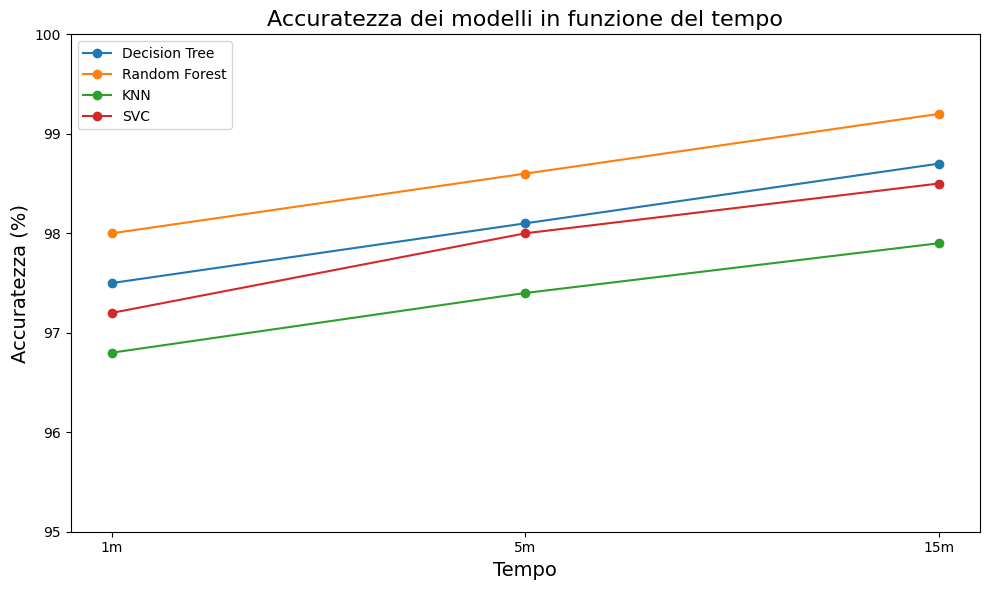

In [258]:
import matplotlib.pyplot as plt

# Dati
times = ['1m', '5m', '15m']  # Tempo
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVC']


# Accuratezze per i modelli
accuracies = {
    'Decision Tree': [accuracy2_1, accuracy1_1, accuracy_1],
    'Random Forest': [accuracy2_2, accuracy1_2, accuracy_2],
    'KNN': [accuracy2_3, accuracy1_3, accuracy_3],
    'SVC': [accuracy2_4, accuracy1_4, accuracy_4]
}

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Traccia le linee per i vari modelli
for model, accuracy in accuracies.items():
    plt.plot(times, accuracy, marker='o', label=model)

# Aggiungere le etichette
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Accuratezza (%)', fontsize=14)
plt.title('Accuratezza dei modelli in funzione del tempo', fontsize=16)
plt.ylim(95, 100)  # Imposta i limiti dell'asse y

# Aggiungi la leggenda
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()
